<a href="https://colab.research.google.com/github/Peter-Apps/coding-camp/blob/main/Getting_Data_Into_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data into Colab


There are several ways to get data into colab. In this notebook we'll go over 4 common ways you can get data loaded. These are not the only ways to do this, and each way has it's own pros & cons.

If you find another way to do this that works well, please let us know!

# I have a local file (csv or xslx)

1. Click the folder icon on the left side of the page
2. Select and upload your file (drag & drop)
3. Hover over the file and click on the 3 dots. Choose copy path
4. Use the code below to import the data. (Use pd.read_xls if you have an excel file or pd.read_csv)

In [ ]:
import pandas as pd

file_path = "Replace this with the path you copied"

data = pd.read_csv(file_path)

# I have a file in my Google Drive

## Option 1 - Use gdown

There are many ways to load a csv file in from Drive. This way involves a library called gdown that lets you download public (anyone with the link can view) files without needing to mount your drive or authenticate with Google.  This works best with csv, zip or xslx files.

1. In Google Drive, set the sharing settings so that anyone with the link can view.
2. Copy the sharing link.
3. From the sharing link, find the file ID. It is a string of characters after the d/ and before the /view.

> For example if the sharing link is:
> https://drive.google.com/file/d/1up9ffCff84H19Zpv9BG7Igj003C-tQY9/view?usp=sharing
> The file ID is 1up9ffCff84H19Zpv9BG7Igj003C-tQY9

4. Replace the file_id and file_name in the code below

In [ ]:
# Installing some extra programs to help us.
# The gdown program works well for downloading large files from Google Drive
!pip -q install gdown==4.6.0
import gdown

file_name = "The name of the file"
file_id = "The File ID from the sharing link"

# Download the file from Google Drive
gdown.download(id=file_id, output=file_name)
data = pd.read_csv(file_name)

## Option 2 - Mount your drive

This will connect your Google Drive to Colab and have it show up in the folder icon on the left hand side of the page. You'll have to authorize this each time you open the notebook.

1. Run the code block below to authorize mounting your drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /gdrive

2. Use the file folder on the left hand side to navigate through your drive to find the file you want to open. (start in the gdrive folder)
3. When you find the file, hover over it and click the 3 dots at the edge of the window.
4. Choose Copy Path
5. Replace the file path in the code cell below.

In [ ]:
file_path = "Replace this with the path you copied"

# This is just an example of what your path may look like
#file_path = "/content/gdrive/MyDrive/School Files/Physics Stuff/Regents Physics/Physics Labs/Circ vs Diameter Data.csv"

data = pd.read_csv(file_path)

# I have a Google Sheet that I want to use

## Option 1 - Publish to the Web (No need for permissions)

1. Open the file.

2. Go to File: Share: Publish to Web

3. In the pop up menu, change "Web Page" to "Comma Separated Values"

4. Click Publish and then OK

5. Copy the link in the box to paste into your code.

In [ ]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTmpSAdFQB1M73boFB25ACPdhW2w2RAqtycUJix51KFVsJJyPKh8lU33qn7os1G1A/pub?output=csv')
data.head(5)

## Option 2 - Use the code snippet

This is a premade snippet from Colab. You can get it by clicking the < > button on the left hand side of the page and searching for Google Sheet.

You'll have to authorize this each time you open the notebook.

1. Replace "Your Spreadsheet Name" with the name of your spreadsheet (if it's unique)

2. If your spreadsheet name is not unique, Replace that line with:
`worksheet = gc.open_by_url("The URL of your spreadsheet")`

3. If your data is not on the sheet named 'Sheet1', replace `.sheet1` with:
`.worksheet("Name of Sheet with Data")`.



In [ ]:
# This is an example. If you run this block it will error

# All these changes would be on line 10 in the block below

# If I have a sheet named 'Circ vs Diameter Data' and the data is on Sheet1
worksheet = gc.open('Circ vs Diameter Data').sheet1

# If I have a sheet named 'Circ vs Diameter Data'
# and the data is on a tab called Data
worksheet = gc.open('Circ vs Diameter Data').worksheet("Data")

# If I have a sheet named Untitled Document and have many versions of that file
# and the data is stored on Sheet1
worksheet = gc.open_by_url('https://docs.google.com/spreadsheet/ccc?key=0Bm...FE&hl').sheet1

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# Open the spreadsheet, see above block for examples that
# may better match your sheet
worksheet = gc.open('Your spreadsheet name').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
pd.DataFrame.from_records(rows)

## Option 3 - Use an extension for Chrome

This is a fairly new option, and I can't guarentee your IT department will let students install it. It adds an option to a Google Sheet to move its data into a Colab Notebook. Check it out [here](https://workspace.google.com/u/0/marketplace/app/sheets_to_colab/945625412720)

# Load files from Github

Hosting files in Github makes them easily accessible to Colab to import in.

This works best for datasets you have already curated and will use the same set each year.

To create or save files in Github, you'll need to [create an account](https://docs.github.com/en/get-started/start-your-journey/creating-an-account-on-github), then you can [upload files](https://docs.github.com/en/repositories/working-with-files/managing-files/adding-a-file-to-a-repository)

1. Once you have uploaded a file, navigate to it in your repository.
2. Open the file and click on the RAW link.
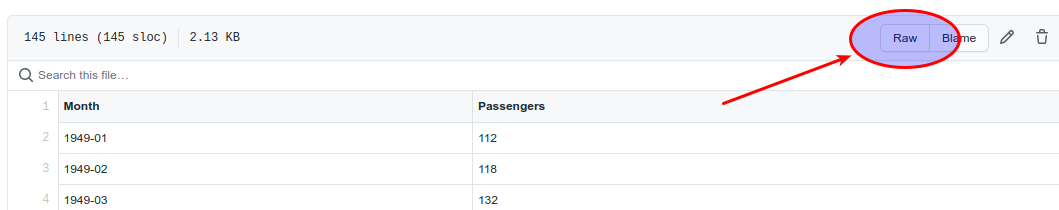
3. Copy that URL
4. Use ```pd.read_csv``` or ```pd.read_excel``` to import the file.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url)

data.head(3)

# Acknowledgements & Licenses

This notebook was created by the QuarkNet Coding fellows, and is intended to be used in our teacher workshops.

The development and implementation of these materials and workshop were additionally funded by generous support from IRIS-HEP, the [Institute for Research and Innovation in Software for High Energy Physics](https://iris-hep.org/).

This work is licensed under a
[Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License][cc-by-nc-sa].

[![CC BY-NC-SA 4.0][cc-by-nc-sa-image]][cc-by-nc-sa]

[cc-by-nc-sa]: http://creativecommons.org/licenses/by-nc-sa/4.0/
[cc-by-nc-sa-image]: https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png
[cc-by-nc-sa-shield]: https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg